In [1]:
import sys
import os
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from scipy.io import arff
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import keras

Using TensorFlow backend.


In [2]:


#data = arff.loadarff('time-features/ScenarioA2/TimeBasedFeatures-Dataset-15s-NO-VPN.arff')
#rawDf = pd.DataFrame(data[0])
#rawDf['label'] = rawDf['label'].str.decode('utf-8')

data_dir = 'ScenarioA2'
filenames = glob.glob(data_dir + "/*-NO-VPN.arff")
dfs = []
for filename in filenames:
    data = arff.loadarff(filename)
    df_small = pd.DataFrame(data[0])
    dfs.append(df_small)
rawDf = pd.concat(dfs, axis=0, ignore_index=True)
rawDf['label'] = rawDf['class1'].str.decode('utf-8')
del rawDf['class1']
rawDf.head(10)

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,label
0,14993462.0,14993462.0,14967812.0,0.0,0.0,823486.0,854818.0,873.134288,287.914517,4612.743875,...,7050.781273,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,BROWSING
1,14463281.0,14463281.0,14432214.0,0.0,0.0,742368.0,742339.0,1321.330258,312.290951,3952.215268,...,6982.036846,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,BROWSING
2,14997099.0,14997042.0,14997087.0,1.0,0.0,537201.0,565232.0,1850.116210,344.855753,3440.398706,...,5560.260369,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,BROWSING
3,14999980.0,14999919.0,14999956.0,2.0,0.0,954084.0,954052.0,1796.827863,382.837498,3168.737558,...,9375.105249,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,BROWSING
4,14989090.0,14989090.0,14964771.0,2.0,0.0,1014690.0,1016593.0,1668.792029,394.588556,3129.542888,...,9205.461338,9578088.0,9578088.0,9578088.0,0.000000,1014624.0,1014624.0,1014624.0,0.000000,BROWSING
5,14866629.0,14866590.0,14856888.0,3.0,0.0,1399330.0,1211310.0,2669.525947,560.277859,2158.391119,...,15324.408383,1753114.0,2932407.5,3999951.0,976090.773365,1133281.0,1170766.0,1208289.0,31592.045017,BROWSING
6,14997616.0,14997616.0,14971193.0,2.0,0.0,957051.0,757034.0,2881.386359,770.123097,1643.394524,...,8275.684172,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,BROWSING
7,14997816.0,14997768.0,14997765.0,7.0,0.0,316297.0,346578.0,7104.579820,1399.828729,855.257859,...,5399.222140,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,BROWSING
8,14988801.0,14988733.0,14988767.0,7.0,0.0,442870.0,472021.0,7901.282551,1411.238772,835.290294,...,8244.026343,-1.0,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,BROWSING
9,14992813.0,14992763.0,14992771.0,7.0,0.0,2894671.0,2923147.0,8950.903284,1658.859372,714.675758,...,28901.017881,14702325.0,14700000.0,14702325.0,0.000000,2894671.0,2894671.0,2894671.0,0.000000,BROWSING


In [3]:
features = list(rawDf.columns.values)[:-1]
scaler = StandardScaler()
# Separating out the features
x = rawDf.loc[:, features].values
#print(x.shape)
# Separating out the class
y = rawDf.loc[:,['label']].values
# Standardizing the features
x = scaler.fit_transform(x)

# Principal Component Analysis

In [4]:
pca = PCA(n_components=20)
#pca = PCA(0.6)
principalComponents = pca.fit_transform(x)
featuresPcaDf = pd.DataFrame(data = principalComponents
             , columns = ['c%d' % c for c in range(1,21)])
principalDf = pd.concat([featuresPcaDf, rawDf[['label']]], axis = 1)
principalDf.head(5)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c12,c13,c14,c15,c16,c17,c18,c19,c20,label
0,-1.234108,-0.343331,-0.242692,0.181459,-0.177532,-0.002437,-0.130391,-0.123372,0.038894,0.015509,...,0.008807,-0.006352,-0.018907,-0.003991,-0.015505,-0.007355,-0.000530,0.003102,0.002247,BROWSING
1,-1.243840,-0.345964,-0.252741,0.154929,-0.140668,-0.014798,-0.128463,-0.126072,0.038672,0.016112,...,0.006323,-0.005163,-0.019521,-0.004073,-0.014901,-0.007549,-0.000396,0.002364,0.002136,BROWSING
2,-1.240203,-0.344401,-0.242499,0.112094,-0.139689,-0.009309,-0.142696,-0.119641,0.043582,0.017803,...,0.001629,-0.002834,-0.021848,-0.003163,-0.013403,-0.010215,-0.000904,0.000620,0.002518,BROWSING
3,-1.229145,-0.339738,-0.235167,0.087318,-0.126843,-0.014005,-0.124611,-0.109573,0.037171,0.014856,...,0.011317,-0.007103,-0.018659,-0.005231,-0.016632,-0.006017,-0.000306,0.004005,0.002132,BROWSING
4,-0.961053,-0.467840,-0.288995,0.094119,-0.102848,-0.043392,-0.025904,-0.113547,0.034632,-0.092515,...,-0.094035,0.120859,0.041030,-0.011559,0.270884,-0.031902,0.124079,0.007428,-0.000384,BROWSING


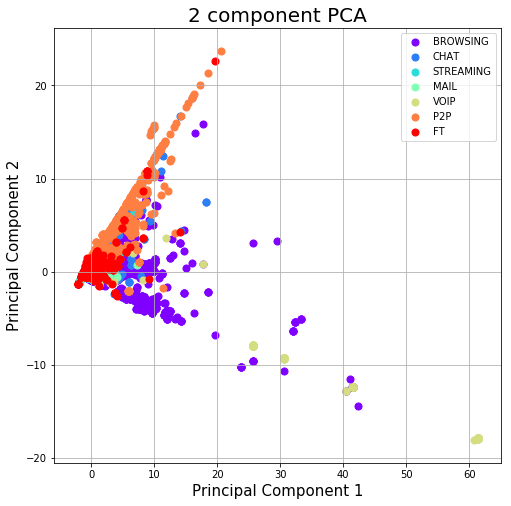

In [5]:
#Visualize PCA results
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#targets = ['BROWSING','CHAT','STREAMING']
targets = ['BROWSING','CHAT','STREAMING','MAIL','VOIP','P2P','FT']
#colors = ['r', 'g', 'b']
colors = cm.rainbow(np.linspace(0, 1, 7))
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['label'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'c1']
               , principalDf.loc[indicesToKeep, 'c2']
               , c = [color]
               , s = 50)
ax.legend(targets)
ax.grid()

# Training with RF

Separate into training and test

In [6]:
# Random forest classifier on Raw data unnormalized
# Set random seed
np.random.seed(0)
#Create training and test data
rawDf['is_train'] = np.random.uniform(0, 1, len(rawDf)) <= .75
rawDf.head(2)

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,label,is_train
0,14993462.0,14993462.0,14967812.0,0.0,0.0,823486.0,854818.0,873.134288,287.914517,4612.743875,...,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,BROWSING,True
1,14463281.0,14463281.0,14432214.0,0.0,0.0,742368.0,742339.0,1321.330258,312.290951,3952.215268,...,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,BROWSING,True


## Train the RF on raw data

In [7]:
y, index = pd.factorize(rawDf['label'])
rawDf['labelx'] = y
rawDf[:10]

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,label,is_train,labelx
0,14993462.0,14993462.0,14967812.0,0.0,0.0,823486.0,854818.0,873.134288,287.914517,4612.743875,...,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,BROWSING,True,0
1,14463281.0,14463281.0,14432214.0,0.0,0.0,742368.0,742339.0,1321.330258,312.290951,3952.215268,...,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,BROWSING,True,0
2,14997099.0,14997042.0,14997087.0,1.0,0.0,537201.0,565232.0,1850.116210,344.855753,3440.398706,...,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,BROWSING,True,0
3,14999980.0,14999919.0,14999956.0,2.0,0.0,954084.0,954052.0,1796.827863,382.837498,3168.737558,...,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,BROWSING,True,0
4,14989090.0,14989090.0,14964771.0,2.0,0.0,1014690.0,1016593.0,1668.792029,394.588556,3129.542888,...,9578088.0,9578088.0,0.000000,1014624.0,1014624.0,1014624.0,0.000000,BROWSING,True,0
5,14866629.0,14866590.0,14856888.0,3.0,0.0,1399330.0,1211310.0,2669.525947,560.277859,2158.391119,...,2932407.5,3999951.0,976090.773365,1133281.0,1170766.0,1208289.0,31592.045017,BROWSING,True,0
6,14997616.0,14997616.0,14971193.0,2.0,0.0,957051.0,757034.0,2881.386359,770.123097,1643.394524,...,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,BROWSING,True,0
7,14997816.0,14997768.0,14997765.0,7.0,0.0,316297.0,346578.0,7104.579820,1399.828729,855.257859,...,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,BROWSING,False,0
8,14988801.0,14988733.0,14988767.0,7.0,0.0,442870.0,472021.0,7901.282551,1411.238772,835.290294,...,0.0,-1.0,0.000000,-1.0,0.0,-1.0,0.000000,BROWSING,False,0
9,14992813.0,14992763.0,14992771.0,7.0,0.0,2894671.0,2923147.0,8950.903284,1658.859372,714.675758,...,14700000.0,14702325.0,0.000000,2894671.0,2894671.0,2894671.0,0.000000,BROWSING,True,0


In [8]:

# Create two new dataframes, one with the training rows, one with the test rows
train, test = rawDf[rawDf['is_train']==True], rawDf[rawDf['is_train']==False]

#Class label to integer mapping for each observation
y_train = train['labelx']
t_test = test['labelx']

# number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 22226
Number of observations in the test data: 7387


In [9]:
# Create a random forest Classifier. clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=4, random_state=0)
# Train the Classifier
clf.fit(train[features], y_train)

/home/learn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [10]:
# Apply the Classifier we trained to the test data
clf.predict(test[features])

array([2, 0, 0, ..., 6, 6, 6])

In [11]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[0.3, 0. , 0.4, 0. , 0. , 0.3, 0. ],
       [0.8, 0. , 0.1, 0. , 0. , 0.1, 0. ],
       [0.9, 0. , 0.1, 0. , 0. , 0. , 0. ],
       [0.9, 0. , 0.1, 0. , 0. , 0. , 0. ],
       [0.3, 0.1, 0. , 0. , 0. , 0.6, 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.9, 0. , 0.1, 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [12]:
# actual class names for each predicted class
#target_names = np.asarray(targets)
preds = index[clf.predict(test[features])]
# View the predicted traffic class for the first five observations
preds[0:5]

Index(['FT', 'BROWSING', 'BROWSING', 'BROWSING', 'STREAMING'], dtype='object')

## RF Confustion Matrix

In [13]:
# Create confusion matrix
cm_raw = pd.crosstab(test['label'], preds, rownames=['Actual Class'], colnames=['Predicted Class'])
cm_raw

Predicted Class,BROWSING,CHAT,FT,MAIL,P2P,STREAMING,VOIP
Actual Class,,,,,,,
BROWSING,2491,18,4,1,3,6,4
CHAT,51,537,17,7,4,1,2
FT,20,14,937,5,1,6,1
MAIL,5,7,37,297,0,1,0
P2P,2,1,2,0,978,0,0
STREAMING,14,0,35,1,1,271,0
VOIP,8,3,16,0,1,2,1575


In [17]:
accuracy = cm_raw.values.diagonal().sum() / np.sum(cm_raw.values)

#display(HTML(("<b>Recall</b>")))
print("=====Recall=====")
print((1 / cm_raw.sum(axis=1)) * cm_raw.values.diagonal())
print("=====Precision==")
#display(HTML(("<b>Precision</b>")))

(1 / cm_raw.sum(axis=0)) * cm_raw.values.diagonal()

=====Recall=====
Actual Class
BROWSING     0.985754
CHAT         0.867528
FT           0.952236
MAIL         0.855908
P2P          0.994914
STREAMING    0.841615
VOIP         0.981308
dtype: float64
=====Precision==


Predicted Class
BROWSING     0.961405
CHAT         0.925862
FT           0.894084
MAIL         0.954984
P2P          0.989879
STREAMING    0.944251
VOIP         0.995575
dtype: float64

In [48]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(test[features])
y_test = test['labelx'].values
print('Accuracy with same features used for traffic categorization: ' + str(accuracy_score(y_test, y_pred)))

Accuracy with same features used for traffic categorization: 0.9592527413022878


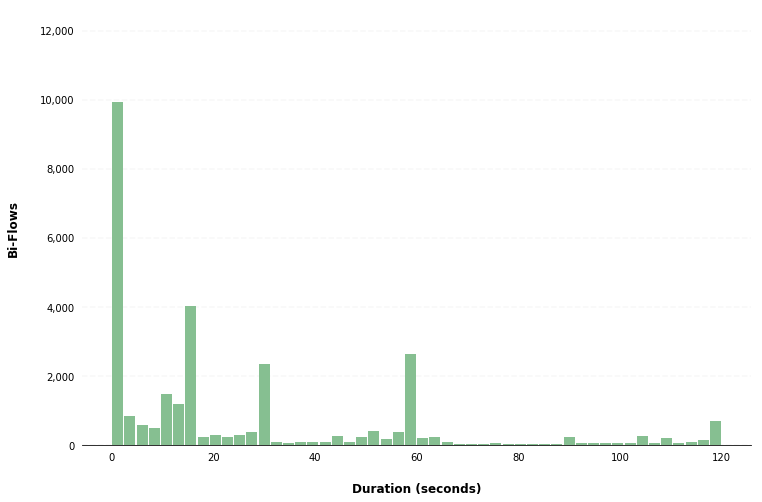

In [67]:
from matplotlib.ticker import StrMethodFormatter
col_hist = 'duration'
df2 = rawDf.copy()
df2[col_hist] = df2[col_hist]/1000000
ax = df2.hist(column=col_hist, bins=50, grid=False, figsize=(12,8), range = [0, 120], color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Duration (seconds)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Bi-Flows", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


## Neural Net

In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.layers.normalization import BatchNormalization

from keras import backend as K
from sklearn.metrics import confusion_matrix

from livelossplot import PlotLossesKeras

In [ ]:
NUM_CLASSES = 7
NUM_FEATURES = len(features)

def create_model_1(mid_layers=[20]):
    model = Sequential()
    model.add(BatchNormalization(input_shape=(NUM_FEATURES,)))
    for n in mid_layers:
        model.add(Dense(n, activation='relu'))
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
X_train = train[features].iloc[:].values
X_test = test[features].iloc[:].values
y_train = to_categorical(train['labelx'])
y_test = to_categorical(test['labelx'])

In [ ]:
model = create_model_1()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[PlotLossesKeras()])

In [ ]:
model = create_model_1(mid_layers=[10, 10, 10, 10])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[PlotLossesKeras()])

In [ ]:
model = create_model_1(mid_layers=[30, 50])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[PlotLossesKeras()])

## Training on PCA data

In [ ]:
# Train random forest classifier on normalized PCA dataset
# Set random seed
np.random.seed(0)
#Create training and test data
principalDf['is_train'] = np.random.uniform(0, 1, len(principalDf)) <= .75
#get feature list
features = list(principalDf.columns.values)
features = features[:10]
# Create two new dataframes, one with the training rows, one with the test rows
train, test = principalDf[principalDf['is_train']==True], principalDf[principalDf['is_train']==False]
#Class label to integer mapping for each observation
y,target_names = pd.factorize(train['label'])

In [ ]:
# Create a random forest Classifier. clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=4, random_state=0, n_estimators = 10)
# Train the Classifier
clf.fit(train[features], y)

In [ ]:
# Apply the Classifier we trained to the test data
clf.predict(test[features])

In [ ]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

In [ ]:
# actual class names for each predicted class
#target_names = np.asarray(targets)
preds = target_names[clf.predict(test[features])]
# View the predicted traffic class for the first five observations
preds[0:5]

In [ ]:
# Create confusion matrix
pd.crosstab(test['label'], preds, rownames=['Actual Class'], colnames=['Predicted Class'])

In [ ]:
train[features][1:10]